# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import ast
import re
from datetime import datetime
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# –ó–∞–≥—Ä—É–∂–∞–µ–º —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–π —É–¥–æ–±–Ω—ã–π –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –¥–∞—Ç–∞—Å–µ—Ç–∞:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# –≤—Å–µ–≥–¥–∞ —Ñ–∏–∫—Å–∏—Ä—É–π—Ç–µ RANDOM_SEED, —á—Ç–æ–±—ã –≤–∞—à–∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã –±—ã–ª–∏ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º—ã!
RANDOM_SEED = 42

In [3]:
# —Ñ–∏–∫—Å–∏—Ä—É–µ–º —Ç–∞–∫ –∂–µ "—Ç–µ–∫—É—â—É—é –¥–∞—Ç—É", —á—Ç–æ–±—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã —Å –¥–µ–ª—å—Ç–æ–π –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ
# —Ç–µ–∫—É—â–µ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ —Ç–∞–∫ –∂–µ –±—ã–ª–∏ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º—ã
CURRENT_DATE = pd.to_datetime('2020-12-08')

In [4]:
# –î–∏—Ä–µ–∫—Ç–æ—Ä–∏—è —Å –¥–∞–Ω–Ω—ã–º–∏
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'

In [5]:
# –∑–∞—Ñ–∏–∫—Å–∏—Ä—É–µ–º –≤–µ—Ä—Å–∏—é –ø–∞–∫–µ—Ç–æ–≤, —á—Ç–æ–±—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã –±—ã–ª–∏ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º—ã:
!pip freeze > requirements.txt

# DATA

In [6]:
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [8]:
df_train.head(5)

Restaurant_id       City                                      Cuisine Style  \
0       id_5569      Paris            ['European', 'French', 'International']   
1       id_1535  Stockholm                                                NaN   
2        id_352     London  ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...   
3       id_3456     Berlin                                                NaN   
4        id_615     Munich  ['German', 'Central European', 'Vegetarian Fri...   

   Ranking  Rating Price Range  Number of Reviews  \
0   5570.0     3.5    $$ - $$$              194.0   
1   1537.0     4.0         NaN               10.0   
2    353.0     4.5        $$$$              688.0   
3   3458.0     5.0         NaN                3.0   
4    621.0     4.0    $$ - $$$               84.0   

                                             Reviews  \
0  [['Good food at your doorstep', 'A good hotel ...   
1  [['Unique cuisine', 'Delicious Nepalese food']...   
2  [['Catch up with friends', 'Not exceptional'],...   
3                                           [[], []]   
4  [['Best place to try a Bavarian food', 'Nice b...   

                                              URL_TA     ID_TA  
0  /Restaurant_Review-g187147-d1912643-Reviews-R_...  d1912643  
1  /Restaurant_Review-g189852-d7992032-Reviews-Bu...  d7992032  
2  /Restaurant_Review-g186338-d8632781-Reviews-RO...  d8632781  
3  /Restaurant_Review-g187323-d1358776-Reviews-Es...  d1358776  
4  /Restaurant_Review-g187309-d6864963-Reviews-Au...  d6864963

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [10]:
df_test.head(5)

Restaurant_id        City  \
0          id_0       Paris   
1          id_1    Helsinki   
2          id_2   Edinburgh   
3          id_3      London   
4          id_4  Bratislava   

                                       Cuisine Style  Ranking Price Range  \
0                                     ['Bar', 'Pub']  12963.0    $$ - $$$   
1  ['European', 'Scandinavian', 'Gluten Free Opti...    106.0    $$ - $$$   
2                            ['Vegetarian Friendly']    810.0    $$ - $$$   
3  ['Italian', 'Mediterranean', 'European', 'Vege...   1669.0        $$$$   
4  ['Italian', 'Mediterranean', 'European', 'Seaf...     37.0        $$$$   

   Number of Reviews                                            Reviews  \
0                4.0                                           [[], []]   
1               97.0  [['Very good reviews!', 'Fine dining in Hakani...   
2               28.0  [['Better than the Links', 'Ivy Black'], ['12/...   
3              202.0  [['Most exquisite', 'Delicious and authentic']...   
4              162.0  [['Always the best in bratislava', 'Very good ...   

                                              URL_TA      ID_TA  
0  /Restaurant_Review-g187147-d10746918-Reviews-L...  d10746918  
1  /Restaurant_Review-g189934-d6674944-Reviews-Ra...   d6674944  
2  /Restaurant_Review-g186525-d13129638-Reviews-B...  d13129638  
3  /Restaurant_Review-g186338-d680417-Reviews-Qui...    d680417  
4  /Restaurant_Review-g274924-d1112354-Reviews-Ma...   d1112354

In [11]:
sample_submission.head(5)

Restaurant_id  Rating
0          id_0     2.0
1          id_1     2.5
2          id_2     4.0
3          id_3     1.0
4          id_4     4.0

In [12]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [13]:
# –í–ê–ñ–ù–û! –¥—Ä—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –æ–±—ä–µ–¥–∏–Ω—è–µ–º —Ç—Ä–µ–π–Ω –∏ —Ç–µ—Å—Ç –≤ –æ–¥–∏–Ω –¥–∞—Ç–∞—Å–µ—Ç
df_train['sample'] = 1 # –ø–æ–º–µ—á–∞–µ–º –≥–¥–µ —É –Ω–∞—Å —Ç—Ä–µ–π–Ω
df_test['sample'] = 0 # –ø–æ–º–µ—á–∞–µ–º –≥–¥–µ —É –Ω–∞—Å —Ç–µ—Å—Ç
df_test['Rating'] = 0 # –≤ —Ç–µ—Å—Ç–µ —É –Ω–∞—Å –Ω–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è Rating, –º—ã –µ–≥–æ –¥–æ–ª–∂–Ω—ã –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å, –ø–æ —ç—Ç–æ–º—É –ø–æ–∫–∞ –ø—Ä–æ—Å—Ç–æ –∑–∞–ø–æ–ª–Ω—è–µ–º –Ω—É–ª—è–º–∏

data = df_test.append(df_train, sort=False).reset_index(drop=True) # –æ–±—ä–µ–¥–∏–Ω—è–µ–º

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


–ü–æ–¥—Ä–æ–±–Ω–µ–µ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º:
* City: –ì–æ—Ä–æ–¥ 
* Cuisine Style: –ö—É—Ö–Ω—è
* Ranking: –†–∞–Ω–≥ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –¥—Ä—É–≥–∏—Ö —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤ –≤ —ç—Ç–æ–º –≥–æ—Ä–æ–¥–µ
* Price Range: –¶–µ–Ω—ã –≤ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–µ –≤ 3 –∫–∞—Ç–µ–≥–æ—Ä–∏—è—Ö
* Number of Reviews: –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤
* Reviews: 2 –ø–æ—Å–ª–µ–¥–Ω–∏—Ö –æ—Ç–∑—ã–≤–∞ –∏ –¥–∞—Ç—ã —ç—Ç–∏—Ö –æ—Ç–∑—ã–≤–æ–≤
* URL_TA: —Å—Ç—Ä–∞–Ω–∏—Ü–∞ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞ –Ω–∞ 'www.tripadvisor.com' 
* ID_TA: ID —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞ –≤ TripAdvisor
* Rating: –†–µ–π—Ç–∏–Ω–≥ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞

In [15]:
data.sample(5)

Restaurant_id     City                           Cuisine Style  Ranking  \
3565        id_3565   London                              ['Indian']  16229.0   
14007       id_7618    Paris                                     NaN   7619.0   
1895        id_1895  Hamburg                                     NaN   1919.0   
11028      id_16353   London                  ['Fast Food', 'Halal']  16370.0   
27773       id_5760   Madrid  ['International', 'Spanish', 'Fusion']   5763.0   

      Price Range  Number of Reviews  \
3565          NaN                2.0   
14007         NaN                6.0   
1895          NaN                3.0   
11028         NaN                NaN   
27773    $$ - $$$                NaN   

                                                 Reviews  \
3565   [['Dinner with a mate', 'WORST Indian ever'], ...   
14007                    [['Awesome!!'], ['07/25/2016']]   
1895                                            [[], []]   
11028           [['THE WINGS DISASTER'], ['05/18/2017']]   
27773                                           [[], []]   

                                                  URL_TA      ID_TA  sample  \
3565   /Restaurant_Review-g186338-d5489885-Reviews-In...   d5489885       0   
14007  /Restaurant_Review-g187147-d9807467-Reviews-La...   d9807467       1   
1895   /Restaurant_Review-g187331-d12825112-Reviews-P...  d12825112       0   
11028  /Restaurant_Review-g186338-d7274076-Reviews-Or...   d7274076       1   
27773  /Restaurant_Review-g187514-d12805951-Reviews-A...  d12805951       1   

       Rating  
3565      0.0  
14007     4.5  
1895      0.0  
11028     1.0  
27773     4.0

–ö–∞–∫ –≤–∏–¥–∏–º, –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —É –Ω–∞—Å —Ç—Ä–µ–±—É–µ—Ç –æ—á–∏—Å—Ç–∫–∏ –∏ –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏.

# Cleaning and Prepping Data
–û–±—ã—á–Ω–æ –¥–∞–Ω–Ω—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç –≤ —Å–µ–±–µ –∫—É—á—É –º—É—Å–æ—Ä–∞, –∫–æ—Ç–æ—Ä—ã–π –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø–æ—á–∏—Å—Ç–∏—Ç—å, –¥–ª—è —Ç–æ–≥–æ —á—Ç–æ–±—ã –ø—Ä–∏–≤–µ—Å—Ç–∏ –∏—Ö –≤ –ø—Ä–∏–µ–º–ª–µ–º—ã–π —Ñ–æ—Ä–º–∞—Ç. –ß–∏—Å—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö ‚Äî —ç—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–π —ç—Ç–∞–ø —Ä–µ—à–µ–Ω–∏—è –ø–æ—á—Ç–∏ –ª—é–±–æ–π —Ä–µ–∞–ª—å–Ω–æ–π –∑–∞–¥–∞—á–∏.   

## 1. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –æ–±—Ä–∞–±–æ—Ç–∫–∞ NAN 
–£ –Ω–∞–ª–∏—á–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –º–æ–≥—É—Ç –±—ã—Ç—å —Ä–∞–∑–Ω—ã–µ –ø—Ä–∏—á–∏–Ω—ã, –Ω–æ –ø—Ä–æ–ø—É—Å–∫–∏ –Ω—É–∂–Ω–æ –ª–∏–±–æ –∑–∞–ø–æ–ª–Ω–∏—Ç—å, –ª–∏–±–æ –∏—Å–∫–ª—é—á–∏—Ç—å –∏–∑ –Ω–∞–±–æ—Ä–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é. –ù–æ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ –Ω—É–∂–Ω–æ –±—ã—Ç—å –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω—ã–º, **–¥–∞–∂–µ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –º–æ–∂–µ—Ç –±—ã—Ç—å –≤–∞–∂–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º!**   
–ü–æ —ç—Ç–æ–º—É –ø–µ—Ä–µ–¥ –æ–±—Ä–∞–±–æ—Ç–∫–æ–π NAN –ª—É—á—à–µ –≤—ã–Ω–µ—Å—Ç–∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –Ω–∞–ª–∏—á–∏–∏ –ø—Ä–æ–ø—É—Å–∫–∞ –∫–∞–∫ –æ—Ç–¥–µ–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ 

### 1.1 –ü—Ä–∏–∑–Ω–∞–∫ Restaurant_id

In [16]:
# –°–Ω–∞—á–∞–ª–∞ —Å–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –±—ã—Å—Ç—Ä–æ–≥–æ –ø–æ–ª—É—á–µ–Ω–∏—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –ø–æ —Å—Ç–æ–ª–±—Ü—É:
def col_overview(x):
    print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤: {},'.format(x.isnull().sum()))
    print('{},'.format(x.describe()))
    print('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ:\n{},'.format(x.value_counts()))

In [17]:
col_overview(data.Restaurant_id)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤: 0,
count      50000
unique     13094
top       id_436
freq          19
Name: Restaurant_id, dtype: object,
–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ:
id_436      19
id_871      19
id_227      19
id_633      19
id_585      18
            ..
id_13636     1
id_11782     1
id_13202     1
id_11859     1
id_9983      1
Name: Restaurant_id, Length: 13094, dtype: int64,


–í—ã–≤–æ–¥—ã –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É:
* –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É –Ω–µ—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤
* —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤—Å–µ–≥–æ 13094
* —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–µ—Å—è —Ä–µ—Å—Ç–æ—Ä–∞–Ω—ã —è–≤–ª—è—é—Ç—Å—è —Å–µ—Ç–µ–≤—ã–º–∏ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞–º–∏

### 1.2 –ü—Ä–∏–∑–Ω–∞–∫ City

In [18]:
col_overview(data.City)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤: 0,
count      50000
unique        31
top       London
freq        7193
Name: City, dtype: object,
–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ:
London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: City, dtype: int64,


–í—ã–≤–æ–¥—ã –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É:
–°–∞–º–æ–µ –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤ –≤ –õ–æ–Ω–¥–æ–Ω–µ, —Å–∞–º–æ–µ –º–µ–Ω—å—à–µ–µ –≤ –õ—é–±–ª—è–Ω–µ. –ü—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É –Ω–µ—Ç.–í—Å–µ–≥–æ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω 31 –≥–æ—Ä–æ–¥. –î—É–±–ª–µ–π, —Å–≤—è–∑–∞–Ω–Ω—ã—Ö —Å –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω—ã–º –Ω–∞–∑–≤–∞–Ω–∏–µ–º –≥–æ—Ä–æ–¥–æ–≤ —Ç–æ–∂–µ –Ω–µ –Ω–∞–π–¥–µ–Ω–æ

### 1.3 –ü—Ä–∏–∑–Ω–∞–∫ Cuisine Style

In [19]:
#–í–≤–µ–¥–µ–º –ø—Ä–∏–∑–Ω–∞–∫ –ø–æ –æ—Ç—Å—É—Å—Ç–≤–∏—é –¥–∞–Ω–Ω—ã—Ö
data['Cuisine_Style_isNAN'] = pd.isna(data['Cuisine Style']).astype('uint8')

In [20]:
# –¢–∞–∫ –∫–∞–∫ –ø–æ –æ–¥–Ω–æ–º—É —Ä–µ—Å—Ç–æ—Ä–∞–Ω—É –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –Ω–µ—Å–∫–æ–ª—å–∫–æ –∑–∞–ø–∏—Å–µ–π, —Ç–æ –º–æ–∂–Ω–æ 
# –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –∑–∞–º–µ–Ω–∏—Ç—å —É–∂–µ –∏–º–µ—é—â–∏–º–∏—Å—è –¥–∞–Ω–Ω—ã–º–∏ –ø–æ —ç—Ç–∏–º —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞–º
data['Cuisine Style'] = data.sort_values('Cuisine Style').groupby('Restaurant_id')['Cuisine Style'].ffill()
data.head()

Restaurant_id        City  \
0          id_0       Paris   
1          id_1    Helsinki   
2          id_2   Edinburgh   
3          id_3      London   
4          id_4  Bratislava   

                                       Cuisine Style  Ranking Price Range  \
0                                     ['Bar', 'Pub']  12963.0    $$ - $$$   
1  ['European', 'Scandinavian', 'Gluten Free Opti...    106.0    $$ - $$$   
2                            ['Vegetarian Friendly']    810.0    $$ - $$$   
3  ['Italian', 'Mediterranean', 'European', 'Vege...   1669.0        $$$$   
4  ['Italian', 'Mediterranean', 'European', 'Seaf...     37.0        $$$$   

   Number of Reviews                                            Reviews  \
0                4.0                                           [[], []]   
1               97.0  [['Very good reviews!', 'Fine dining in Hakani...   
2               28.0  [['Better than the Links', 'Ivy Black'], ['12/...   
3              202.0  [['Most exquisite', 'Delicious and authentic']...   
4              162.0  [['Always the best in bratislava', 'Very good ...   

                                              URL_TA      ID_TA  sample  \
0  /Restaurant_Review-g187147-d10746918-Reviews-L...  d10746918       0   
1  /Restaurant_Review-g189934-d6674944-Reviews-Ra...   d6674944       0   
2  /Restaurant_Review-g186525-d13129638-Reviews-B...  d13129638       0   
3  /Restaurant_Review-g186338-d680417-Reviews-Qui...    d680417       0   
4  /Restaurant_Review-g274924-d1112354-Reviews-Ma...   d1112354       0   

   Rating  Cuisine_Style_isNAN  
0     0.0                    0  
1     0.0                    0  
2     0.0                    0  
3     0.0                    0  
4     0.0                    0

In [21]:
#–ü—Ä–æ–≤–µ—Ä—è–µ–º —Å–∫–æ–ª—å–∫–æ –µ—â–µ –æ—Å—Ç–∞–ª–æ—Å—å –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ
data['Cuisine Style'].isnull().sum()

1662

In [22]:
# –ó–∞–º–µ–Ω–∏–º –æ—Å—Ç–∞–≤—à–∏–µ—Å—è –ø—Ä–æ–ø—É—Å–∫–∏ —Å–∞–º—ã–º —á–∞—Å—Ç—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –∫—É—Ö–Ω–∏:
data['Cuisine Style']= data['Cuisine Style'].dropna().map(lambda x: re.sub(r"[\]'[]", '', x))
cuisine_series = pd.Series(data['Cuisine Style'].str.cat(sep = ', ').split(', '))
data['Cuisine Style'] = data['Cuisine Style'].fillna(cuisine_series.value_counts().index[0])

In [23]:
data['Cuisine Style'] = data['Cuisine Style'].str.strip(',')

In [24]:
# –°–Ω–æ–≤–∞ –ø—Ä–æ–≤–µ—Ä–∏–º –Ω–∞–ª–∏—á–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤
data['Cuisine Style'].isnull().sum()

0

In [25]:
# –ó–∞–ø–∏—à–µ–º –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∏–ø–æ–≤ –∫—É—Ö–Ω–∏
data['Cuisine_Style_Count'] = data['Cuisine Style'].apply(lambda x: len(x))
# –ù–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∫—É—Ö–Ω–∏
CS_top5 = set(data['Cuisine Style'].explode().value_counts()[:5].index)

–í—ã–≤–æ–¥—ã –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É:
–ü–æ –ø—Ä–∏–∑–Ω–∞–∫—É –∏–º–µ—é—Ç—Å—è –ø—Ä–æ–ø—É—Å–∫–∏, —Ç–∞–∫–∂–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Å–ø–∏—Å–∫–æ–≤ –∏–∑ —Ä–∞–∑–Ω—ã—Ö –≤–∏–¥–æ–≤ –∫—É—Ö–æ–Ω—å.
–ü–æ –æ–¥–Ω–æ–π —Å–µ—Ç–∏ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤ –º–æ–≥—É—Ç –±—ã—Ç—å —Ä–∞–∑–Ω—ã–µ –≤–∏–¥—ã –∫—É—Ö–æ–Ω—å –≤ —Ä–∞–∑–Ω—ã—Ö –≥–æ—Ä–æ–¥–∞—Ö. 
–ù–∞ –±—É–¥—É—â–µ–µ: –Ω—É–∂–Ω–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –∫—É—Ö–Ω–∏ –ø–æ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞–º –∏ –≤–∑—è—Ç—å —Ç–µ, –∫–æ—Ç–æ—Ä—ã–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –≤–æ –≤—Å–µ—Ö —Ä–µ—Å—Ç–æ—Ä–∞–Ω–∞—Ö.

### 1.4 –ü—Ä–∏–∑–Ω–∞–∫ Price range

In [26]:
col_overview(data['Price Range'])

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤: 17361,
count        32639
unique           3
top       $$ - $$$
freq         23041
Name: Price Range, dtype: object,
–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ:
$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64,


In [27]:
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ø—Ä–æ–ø–æ—Ä—Ü–∏–∏ –∑–Ω–∞—á–µ–Ω–∏–π
data['Price Range'].value_counts(normalize=True)

$$ - $$$    0.705935
$           0.239468
$$$$        0.054597
Name: Price Range, dtype: float64

–í –¥–∞–Ω–Ω—ã—Ö –∏–º–µ–µ—Ç—Å—è –º–Ω–æ–≥–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤. –ü–æ–ø—Ä–æ–±—É–µ–º –∑–∞–º–µ–Ω–∏—Ç—å –∏—Ö –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –ø—Ä–∏–∑–Ω–∞–∫–∞

In [28]:
data['Price Range'] = data['Price Range'].fillna(pd.Series(np.random.choice(['$$$$', '$', '$$ - $$$'], 
                                                      p=[0.05, 0.24, 0.71], size=len(data))))

In [29]:
data['Price Range'].isnull().sum()

0

–í—ã–≤–æ–¥—ã –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É:
–ü–æ –ø—Ä–∏–∑–Ω–∞–∫—É –º–Ω–æ–≥–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ (35%). –í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π -3.

### 1.5 –ü—Ä–∏–∑–Ω–∞–∫ Number of Reviews

In [30]:
col_overview(data['Number of Reviews'])

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤: 3200,
count    46800.000000
mean       124.471197
std        294.114345
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: Number of Reviews, dtype: float64,
–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ:
2.0       2403
3.0       2042
4.0       1707
5.0       1471
6.0       1258
          ... 
5216.0       1
1932.0       1
1050.0       1
1145.0       1
1471.0       1
Name: Number of Reviews, Length: 1573, dtype: int64,


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ- 3200. –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ NaN –≤ number_of_reviews - —ç—Ç–æ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤, –∑–∞–º–µ–Ω–∏–º –Ω–∞ 0. 

In [31]:
# –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ 6% –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π - —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –Ω–µ –±—ã–ª–æ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤
# —Å–æ—Ö—Ä–∞–Ω–∏–º —ç—Ç—É –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [32]:
# –î–∞–ª–µ–µ –∑–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ 0
# data['Number of Reviews'].fillna(0, inplace=True)
data['Number of Reviews'] = data['Number of Reviews'].fillna(
    data.groupby('City')['Number of Reviews'].transform('mean'))

### 1.6 –ü—Ä–∏–∑–Ω–∞–∫ Reviews

–ü–æ—Å–º–æ—Ç—Ä–∏–º —Å–∫–æ–ª—å–∫–æ –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –µ—Å—Ç—å –≤ —Å—Ç–æ–ª–±—Ü–µ:

In [33]:
rev=data[data['Reviews'].isnull()]
rev.head()

Restaurant_id    City        Cuisine Style  Ranking Price Range  \
8168       id_8168  Lisbon  Vegetarian Friendly   3389.0    $$ - $$$   
9608       id_9608  Vienna  Vegetarian Friendly   1779.0    $$ - $$$   

      Number of Reviews Reviews  \
8168           2.000000     NaN   
9608          80.535094     NaN   

                                                 URL_TA      ID_TA  sample  \
8168  /Restaurant_Review-g189158-d12683988-Reviews-O...  d12683988       0   
9608  /Restaurant_Review-g190454-d12605368-Reviews-R...  d12605368       0   

      Rating  Cuisine_Style_isNAN  Cuisine_Style_Count  \
8168     0.0                    1                   19   
9608     0.0                    1                   19   

      Number_of_Reviews_isNAN  
8168                        0  
9608                        1

–í—Å–µ–≥–æ –¥–≤–∞ –∑–Ω–∞—á–µ–Ω–∏—è, —Ö–æ—Ç—è –µ—Å—Ç—å –º–Ω–æ–≥–æ –∑–∞–ø–∏—Å–µ–π –≤ –≤–∏–¥–µ –ø—É—Å—Ç—ã—Ö —Å–ø–∏—Å–∫–æ–≤ [[],[]]

In [34]:
# –ü—Ä–∏–≤–µ–¥–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –∫ –µ–¥–∏–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É:
data['Reviews'] = data['Reviews'].fillna('[[], []]')

In [35]:
# –°–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –æ—Ç–∑—ã–≤–æ–≤ –æ—Ç –¥–∞—Ç
def return_review_date(row, mode = 'newest'):
    '''replacing nan values from text reviews cause of ast.literal_eval error
       Function returns NaN if reviews are empty
       Function returns one date if it is only one review
       Function returns newest/oldest review according to mode'''
    str_review = ast.literal_eval(str(row['Reviews']).replace('nan','0'))
    if str_review == [[], []]:
        return 'NaN'
    elif len(str_review[1]) == 1:
        return(datetime.strptime(str_review[1][0],'%m/%d/%Y'))
    else:
        first_review_time = datetime.strptime(str_review[1][0],'%m/%d/%Y')
        second_review_time = datetime.strptime(str_review[1][1],'%m/%d/%Y')
        if mode == 'newest':
            return max(second_review_time, first_review_time)
        else:
            return min(second_review_time, first_review_time)

In [36]:
# –ü–æ–ª—É—á–∏–º –Ω–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã —Å –¥–∞—Ç–∞–º–∏ –ø—Ä–∏–º–µ–Ω–∏–º —Ñ—É–Ω–∫—Ü–∏—é:
data['recent_review_date'] = data.apply(lambda row:return_review_date(row, mode='newest'), axis=1)
data['old_review_date'] = data.apply(lambda row:return_review_date(row, mode='eldest'), axis=1)

In [37]:
# —Å–æ–∑–¥–∞–¥–∏–º –ø—Ä–∏–∑–Ω–∞–∫ –¥–ª—è —Ç–µ—Ö —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤, —É –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç –æ–±–∑–æ—Ä–æ–≤ –≤–æ–æ–±—â–µ
data['Reviews_is_nan'] = pd.isna(data['recent_review_date']).astype('float64')

In [38]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∞—Ç—É —Å–∞–º–æ–≥–æ —Å–≤–µ–∂–µ–≥–æ –æ–±–∑–æ—Ä–∞, –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ —Ç–æ–≥–¥–∞ –¥–∞—Ç–∞—Å–µ—Ç –∏ —Å–æ–±–∏—Ä–∞–ª—Å—è
most_recent_review_date = data['recent_review_date'].max()
most_recent_review_date

Timestamp('2018-02-26 00:00:00')

In [39]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∞—Ç—É —Å–∞–º–æ–≥–æ —Å—Ç–∞—Ä–æ–≥–æ –æ–±–∑–æ—Ä–∞, —É—á—Ç–µ–º —á—Ç–æ Tripadviser –±—ã–ª —Å–æ–∑–¥–∞–Ω –≤ 2000 –≥–æ–¥—É
oldest_review_date = data['old_review_date'].min()
oldest_review_date

Timestamp('2004-04-21 00:00:00')

In [40]:
# –ü–æ—Å—á–∏—Ç–∞–µ–º —Ä–∞–∑–Ω–∏—Ü—É –≤ –¥–Ω—è—Ö –º–µ–∂–¥—É –æ–±–∑–æ—Ä–∞–º–∏
data['Days_between_reviews'] = (data['recent_review_date'] - data['old_review_date']).dt.days

In [41]:
data['Days_between_reviews'].max()

3296.0

In [42]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å–∞–º—É—é –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É—é —Ä–∞–∑–Ω–∏—Ü—É
data[data['Days_between_reviews']==3296]

Restaurant_id      City                              Cuisine Style  \
1966       id_1966  Helsinki  Mediterranean, Greek, Vegetarian Friendly   

      Ranking Price Range  Number of Reviews  \
1966   1117.0    $$ - $$$                2.0   

                                                Reviews  \
1966  [['Mixed feelings', 'Bear & Karaoke place.'], ...   

                                                 URL_TA     ID_TA  sample  \
1966  /Restaurant_Review-g189934-d1199811-Reviews-Ba...  d1199811       0   

      Rating  Cuisine_Style_isNAN  Cuisine_Style_Count  \
1966     0.0                    1                   41   

      Number_of_Reviews_isNAN recent_review_date old_review_date  \
1966                        0         2017-11-14      2008-11-05   

      Reviews_is_nan  Days_between_reviews  
1966             0.0                3296.0

–ø–æ —ç—Ç–æ–º—É —Ä–µ—Å—Ç–æ—Ä–∞–Ω—É —Å–∞–º–∞—è —Å—Ç–∞—Ä–∞—è –¥–∞—Ç–∞ –æ—Ç 2008 –≥–æ–¥–∞

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤: 8114,
count                   41886
unique                   2278
top       2018-01-03 00:00:00
freq                      231
first     2004-04-21 00:00:00
last      2018-02-26 00:00:00
Name: old_review_date, dtype: object,
–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ:
2018-01-03    231
2017-12-30    194
2018-01-04    191
2018-01-01    190
2017-12-22    187
             ... 
2013-08-25      1
2010-05-18      1
2009-08-20      1
2013-01-22      1
2012-03-30      1
Name: old_review_date, Length: 2278, dtype: int64,


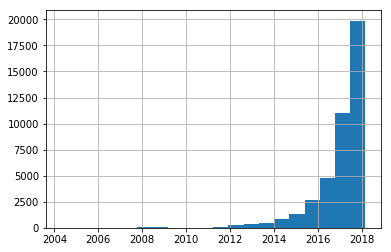

In [43]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –¥–∞–Ω—ã –ø–æ –¥–∞—Ç–∞–º –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤
data['old_review_date'].hist(bins=20)
col_overview(data['old_review_date'])

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤: 8114,
count                   41886
unique                   1976
top       2018-01-07 00:00:00
freq                      646
first     2004-04-21 00:00:00
last      2018-02-26 00:00:00
Name: recent_review_date, dtype: object,
–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ:
2018-01-07    646
2018-01-03    568
2018-01-06    522
2018-01-04    492
2018-01-08    477
             ... 
2014-09-22      1
2013-08-07      1
2013-07-27      1
2014-03-05      1
2014-07-12      1
Name: recent_review_date, Length: 1976, dtype: int64,


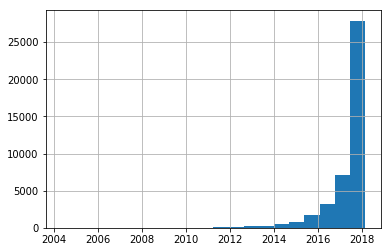

In [44]:
data['recent_review_date'].hist(bins=20)
col_overview(data['recent_review_date'])

In [45]:
#–ó–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ —Å–∞–º—ã–º–∏ —á–∞—Å—Ç—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –∏–∑ –∫–∞–∂–¥–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞
data['recent_review_date'] = data['recent_review_date'].fillna(
    data['recent_review_date'].mode().iloc[0])
data['old_review_date'] = data['old_review_date'].fillna(
    data['old_review_date'].mode().iloc[0])

In [46]:
#—Ç–∞–∫–∂–µ —Å–æ–∑–¥–∞–¥–∏–º –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫: –∫–æ–ª-–≤–æ –¥–Ω–µ–π –¥–æ —Å–∞–º–æ–≥–æ –Ω–æ–≤–æ–≥–æ –æ—Ç–∑—ã–≤–∞
data['days_to_most_recent_review'] = (most_recent_review_date - 
                                      data['recent_review_date']).dt.days

In [47]:
data.head()

Restaurant_id        City  \
0          id_0       Paris   
1          id_1    Helsinki   
2          id_2   Edinburgh   
3          id_3      London   
4          id_4  Bratislava   

                                       Cuisine Style  Ranking Price Range  \
0                                           Bar, Pub  12963.0    $$ - $$$   
1  European, Scandinavian, Gluten Free Options, V...    106.0    $$ - $$$   
2                                Vegetarian Friendly    810.0    $$ - $$$   
3  Italian, Mediterranean, European, Vegetarian F...   1669.0        $$$$   
4  Italian, Mediterranean, European, Seafood, Veg...     37.0        $$$$   

   Number of Reviews                                            Reviews  \
0                4.0                                           [[], []]   
1               97.0  [['Very good reviews!', 'Fine dining in Hakani...   
2               28.0  [['Better than the Links', 'Ivy Black'], ['12/...   
3              202.0  [['Most exquisite', 'Delicious and authentic']...   
4              162.0  [['Always the best in bratislava', 'Very good ...   

                                              URL_TA      ID_TA  sample  \
0  /Restaurant_Review-g187147-d10746918-Reviews-L...  d10746918       0   
1  /Restaurant_Review-g189934-d6674944-Reviews-Ra...   d6674944       0   
2  /Restaurant_Review-g186525-d13129638-Reviews-B...  d13129638       0   
3  /Restaurant_Review-g186338-d680417-Reviews-Qui...    d680417       0   
4  /Restaurant_Review-g274924-d1112354-Reviews-Ma...   d1112354       0   

   Rating  Cuisine_Style_isNAN  Cuisine_Style_Count  Number_of_Reviews_isNAN  \
0     0.0                    0                    8                        0   
1     0.0                    0                   79                        0   
2     0.0                    0                   19                        0   
3     0.0                    0                   74                        0   
4     0.0                    0                   83                        0   

  recent_review_date old_review_date  Reviews_is_nan  Days_between_reviews  \
0         2018-01-07      2018-01-03             1.0                   NaN   
1         2017-12-05      2017-10-29             0.0                  37.0   
2         2017-12-28      2017-12-06             0.0                  22.0   
3         2017-12-06      2017-11-22             0.0                  14.0   
4         2018-02-08      2018-01-24             0.0                  15.0   

   days_to_most_recent_review  
0                          50  
1                          83  
2                          60  
3                          82  
4                          18

In [48]:
#–ó–∞–ø–æ–ª–Ω–∏–º –ø—É—Å—Ç—ã–µ —Å–ø–∏—Å–∫–∏ –≤ Review –∏ –ø–æ—á–∏—Å—Ç–∏–º —Ñ–æ—Ä–º–∞—Ç —Å—Ç–æ–ª–±—Ü–∞  
data['Reviews'] = data['Reviews'].astype(str).apply(lambda x: x.replace('[[], []]', 'no data'))
data['Reviews'] = data['Reviews'].map(lambda x: re.sub(r"[\]'[]", '', x))
data.head()

Restaurant_id        City  \
0          id_0       Paris   
1          id_1    Helsinki   
2          id_2   Edinburgh   
3          id_3      London   
4          id_4  Bratislava   

                                       Cuisine Style  Ranking Price Range  \
0                                           Bar, Pub  12963.0    $$ - $$$   
1  European, Scandinavian, Gluten Free Options, V...    106.0    $$ - $$$   
2                                Vegetarian Friendly    810.0    $$ - $$$   
3  Italian, Mediterranean, European, Vegetarian F...   1669.0        $$$$   
4  Italian, Mediterranean, European, Seafood, Veg...     37.0        $$$$   

   Number of Reviews                                            Reviews  \
0                4.0                                            no data   
1               97.0  Very good reviews!, Fine dining in Hakaniemi, ...   
2               28.0  Better than the Links, Ivy Black, 12/28/2017, ...   
3              202.0  Most exquisite, Delicious and authentic, 12/06...   
4              162.0  Always the best in bratislava, Very good but p...   

                                              URL_TA      ID_TA  sample  \
0  /Restaurant_Review-g187147-d10746918-Reviews-L...  d10746918       0   
1  /Restaurant_Review-g189934-d6674944-Reviews-Ra...   d6674944       0   
2  /Restaurant_Review-g186525-d13129638-Reviews-B...  d13129638       0   
3  /Restaurant_Review-g186338-d680417-Reviews-Qui...    d680417       0   
4  /Restaurant_Review-g274924-d1112354-Reviews-Ma...   d1112354       0   

   Rating  Cuisine_Style_isNAN  Cuisine_Style_Count  Number_of_Reviews_isNAN  \
0     0.0                    0                    8                        0   
1     0.0                    0                   79                        0   
2     0.0                    0                   19                        0   
3     0.0                    0                   74                        0   
4     0.0                    0                   83                        0   

  recent_review_date old_review_date  Reviews_is_nan  Days_between_reviews  \
0         2018-01-07      2018-01-03             1.0                   NaN   
1         2017-12-05      2017-10-29             0.0                  37.0   
2         2017-12-28      2017-12-06             0.0                  22.0   
3         2017-12-06      2017-11-22             0.0                  14.0   
4         2018-02-08      2018-01-24             0.0                  15.0   

   days_to_most_recent_review  
0                          50  
1                          83  
2                          60  
3                          82  
4                          18

–í—ã–≤–æ–¥—ã –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É:
–í –ø—Ä–∏–∑–Ω–∞–∫–µ –µ—Å—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏. –í –∑–Ω–∞—á–µ–Ω–∏—è—Ö –ø—Ä–∏–≤–µ–¥–µ–Ω—ã 2 –æ—Ç–∑—ã–≤–∞ –∏ 2 –¥–∞—Ç—ã –æ—Ç–∑—ã–≤–∞ –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Å—Ç—Ä–æ–∫–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

### 1.7 –ü—Ä–∏–∑–Ω–∞–∫ Ranking

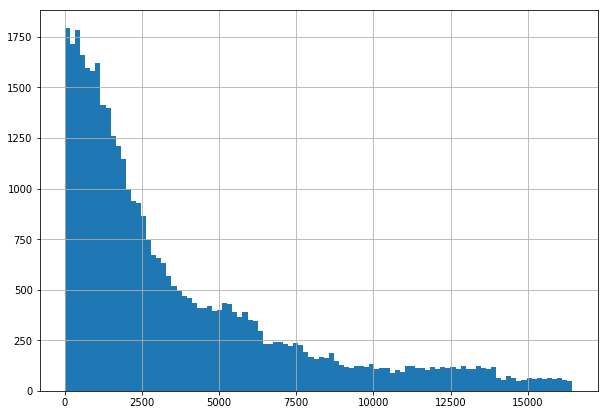

In [49]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

–£ –Ω–∞—Å –º–Ω–æ–≥–æ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –¥–æ—Ç—è–≥–∏–≤–∞—é—Ç –∏ –¥–æ 2500 –º–µ—Å—Ç–∞ –≤ —Å–≤–æ–µ–º –≥–æ—Ä–æ–¥–µ, –∞ —á—Ç–æ —Ç–∞–º –ø–æ –≥–æ—Ä–æ–¥–∞–º?

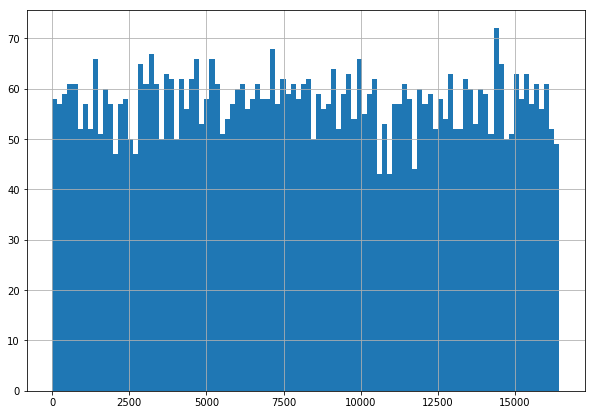

In [50]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

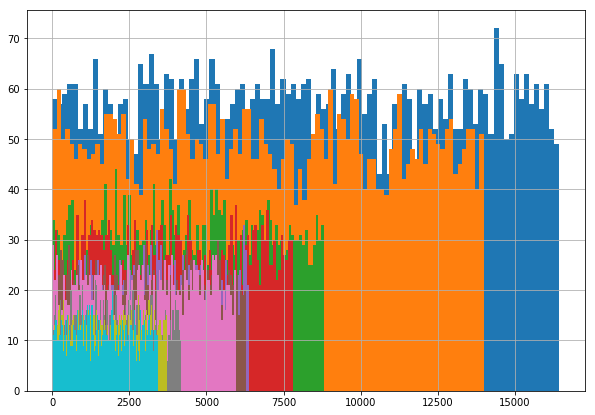

In [51]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ç–æ–ø 10 –≥–æ—Ä–æ–¥–æ–≤
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

–ü–æ–ª—É—á–∞–µ—Ç—Å—è, —á—Ç–æ Ranking –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –ø—Ä–æ—Å—Ç–æ –≤ –±–æ–ª—å—à–∏—Ö –≥–æ—Ä–æ–¥–∞—Ö –±–æ–ª—å—à–µ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤, –∏–∑-–∑–∞ –º—ã —ç—Ç–æ–≥–æ –∏–º–µ–µ–º —Å–º–µ—â–µ–Ω–∏–µ.

>–ü–æ–¥—É–º–∞–π—Ç–µ –∫–∞–∫ –∏–∑ —ç—Ç–æ–≥–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –ø—Ä–∏–∑–Ω–∞–∫ –¥–ª—è –≤–∞—à–µ–π –º–æ–¥–µ–ª–∏. –Ø –ø–æ–∫–∞–∂—É –≤–∞–º –ø—Ä–∏–º–µ—Ä, –∫–∞–∫ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ–º–æ–≥–∞–µ—Ç –Ω–∞—Ö–æ–¥–∏—Ç—å –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏. –ê –¥–∞–ª–µ–µ –¥–µ–π—Å—Ç–≤—É–π—Ç–µ –±–µ–∑ –ø–æ–¥—Å–∫–∞–∑–æ–∫ =) 

### 1.8 –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è Rating

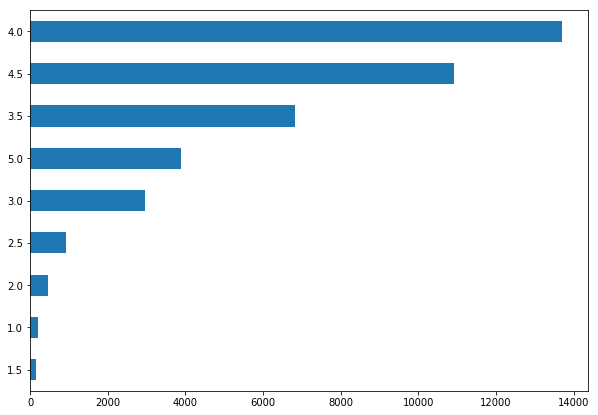

In [52]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

–ü–æ—Å–º–æ—Ç—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–∏–∑–Ω–∞–∫–∞

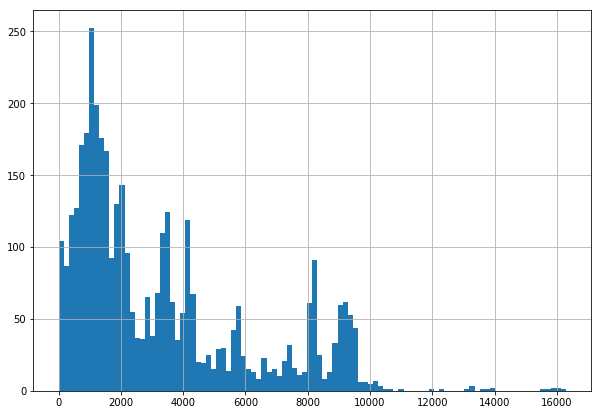

In [53]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

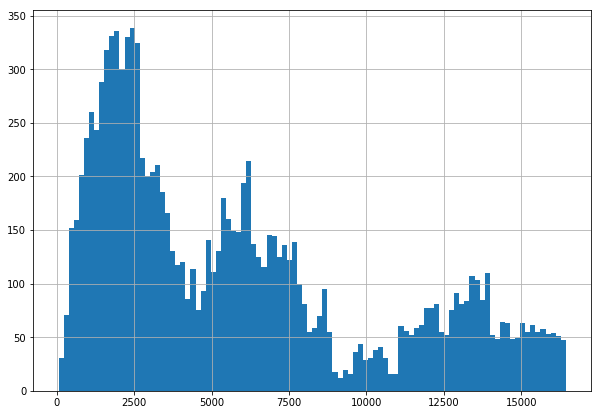

In [54]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

In [55]:
# –ù–∞–π–¥–µ–º —á–∏—Å–ª–æ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤ –≤ –∫–∞–∂–æ–º –≥–æ—Ä–æ–¥–µ –∏ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã–π —Ä–∞–Ω–∫ –Ω–∞ —ç—Ç–æ–π –æ—Å–Ω–æ–≤–µ
data['restaurants_in_city'] = data['City'].map(data['City'].value_counts().to_dict())
data['W_Ranking'] = data['Ranking'] / data['restaurants_in_city']
data['W_Number_of_Reviews'] = data['Number of Reviews'] / data['restaurants_in_city']

### 2. –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
–î–ª—è –Ω–∞—á–∞–ª–∞ –ø–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —É –Ω–∞—Å –º–æ–≥—É—Ç –±—ã—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏.

In [56]:
data.nunique(dropna=False)

Restaurant_id                 13094
City                             31
Cuisine Style                 10731
Ranking                       12975
Price Range                       3
Number of Reviews              1604
Reviews                       41857
URL_TA                        49963
ID_TA                         49963
sample                            2
Rating                           10
Cuisine_Style_isNAN               2
Cuisine_Style_Count             140
Number_of_Reviews_isNAN           2
recent_review_date             1976
old_review_date                2278
Reviews_is_nan                    2
Days_between_reviews           1311
days_to_most_recent_review     1976
restaurants_in_city              31
W_Ranking                     49655
W_Number_of_Reviews            9766
dtype: int64

–ö–∞–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–æ–∂–Ω–æ —Å—á–∏—Ç–∞—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏?

–î–ª—è –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –µ—Å—Ç—å –º–Ω–æ–∂–µ—Å—Ç–≤–æ –ø–æ–¥—Ö–æ–¥–æ–≤:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

–í—ã–±–æ—Ä –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –ø—Ä–∏–∑–Ω–∞–∫–∞ –∏ –≤—ã–±—Ä–∞–Ω–æ–π –º–æ–¥–µ–ª–∏.

### 2.1 –ü—Ä–∏–∑–Ω–∞–∫ "Price Range"

In [57]:
data['Price Range'].value_counts()

$$ - $$$    35406
$           11943
$$$$         2651
Name: Price Range, dtype: int64

–ü–æ –æ–ø–∏—Å–∞–Ω–∏—é 'Price Range' —ç—Ç–æ - –¶–µ–Ω—ã –≤ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–µ.  
–ò—Ö –º–æ–∂–Ω–æ –ø–æ—Å—Ç–∞–≤–∏—Ç—å –ø–æ –≤–æ–∑—Ä–∞—Å—Ç–∞–Ω–∏—é (–∑–Ω–∞—á–∏—Ç —ç—Ç–æ –Ω–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫). –ê —ç—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –∏—Ö –º–æ–∂–Ω–æ –∑–∞–º–µ–Ω–∏—Ç—å –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω—ã–º–∏ —á–∏—Å–ª–∞–º–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä 1,2,3

In [58]:
data['Price_Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')
data['Price Range'] = data['Price Range'].map({'$': 10,'$$ - $$$': 50,
            '$$$$': 200,np.NaN: 50,   # –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–µ –ø—Ä–∏–º–µ–º, –∫–∞–∫ –∏–∑ —Å—Ä–µ–¥–Ω–µ–≥–æ –¥–∏–∞–ø–∞–∑–æ–Ω–∞
        })

In [59]:
data.sample(5)

Restaurant_id       City                  Cuisine Style  Ranking  \
19562       id_4872  Barcelona               Pizza, Fast Food   4873.0   
30664       id_1833       Lyon                          Pizza   1834.0   
8567        id_8567      Paris                         Indian   9094.0   
36219        id_847  Barcelona  American, Fast Food, European    848.0   
2159        id_2159  Amsterdam    Italian, Mediterranean, Pub   1947.0   

       Price Range  Number of Reviews  \
19562           10               38.0   
30664           50               13.0   
8567            50                7.0   
36219           50              154.0   
2159            50               11.0   

                                                 Reviews  \
19562  Comics and lunch!, Great place for cheap tasty...   
30664                                            no data   
8567   Very tasty and friendly üòÉ, The best Indian foo...   
36219  "One of the best burgers Ive ever had!", A fea...   
2159   Really great little pub, A most welcome return...   

                                                  URL_TA      ID_TA  sample  \
19562  /Restaurant_Review-g187497-d10039385-Reviews-G...  d10039385       1   
30664  /Restaurant_Review-g1080938-d8509698-Reviews-L...   d8509698       1   
8567   /Restaurant_Review-g187147-d7284685-Reviews-Al...   d7284685       0   
36219  /Restaurant_Review-g187497-d8027248-Reviews-Ni...   d8027248       1   
2159   /Restaurant_Review-g188590-d8511126-Reviews-Bu...   d8511126       0   

       ...  Number_of_Reviews_isNAN  recent_review_date  old_review_date  \
19562  ...                        0          2017-08-29       2017-04-17   
30664  ...                        0          2018-01-07       2018-01-03   
8567   ...                        0          2017-12-07       2014-11-25   
36219  ...                        0          2017-12-15       2017-10-27   
2159   ...                        0          2017-02-07       2017-01-19   

       Reviews_is_nan Days_between_reviews days_to_most_recent_review  \
19562             0.0                134.0                        181   
30664             1.0                  NaN                         50   
8567              0.0               1108.0                         81   
36219             0.0                 49.0                         73   
2159              0.0                 19.0                        384   

       restaurants_in_city  W_Ranking  W_Number_of_Reviews  Price_Range_isNAN  
19562                 3395   1.435346             0.011193                  0  
30664                 1126   1.628774             0.011545                  0  
8567                  6108   1.488867             0.001146                  0  
36219                 3395   0.249779             0.045361                  0  
2159                  1372   1.419096             0.008017                  0  

[5 rows x 23 columns]

### 2.2 –ü—Ä–∏–∑–Ω–∞–∫ "Cuisine Style"

In [60]:
# –î–µ–ª–∞–µ–º dummies –∏–∑ –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –∫—É—Ö–æ–Ω—å
values = data['Cuisine Style']
mask = values.isin(CS_top5)
data=data.join(pd.get_dummies(values[mask]))

### 2.3 –ü—Ä–∏–∑–Ω–∞–∫ "Reviews"

–°–æ–∑–¥–∞–¥–∏–º —Å–ª–æ–≤–∞—Ä–∏ —Å —Ñ—Ä–∞–∑–∞–º–∏ –∏ —Å–ª–æ–≤–∞–º–∏ –∏–∑ Review:

In [61]:
great = ["Delicious", "Great", "tasteful","Awesome", "Must Visit", "Brilliant","delicious", "great","favourites", "Recommend it", "EXCELLENT", "Perfect", "tasty", "COMPLETELY REAL", "outstanding", "Favourite", "Wonderful", "fantastic", "Fantastic", "Superb", "Amazing",
         "BEST", "wonderful", "perfect", "Best", "best", "AMAZING","Amazing", "favorite", "Excellent", "excellent", "GREAT", "Cool", "cool", "Delightful"]
good = ["Good", "good", "Nice", "average","Pleasant", "surprise","hospitable", "Cosy", "Soso", "Average", "Beautiful", "nice", "No bad", "Friendly", "friendly", "charm",
        "no bad", "Not bad", "pleasant","Welcoming", "is ok", "OK", "not bad", "relaxing", "Relaxing", "Alright", "Love", "Tasty"]
bad = ["No", "no", "Mediocre", "not", "Not", "poor", "bad", "Worst", "Bad", "Shameful",
       "Too busy", "appalling", "rude", "Dirty", "Underwhelmed","Awful", "hidden gem", "Horrible", "horrible", "Disappointed", "Don't eat", "Avoid", "could improve", "Dissapointed"]

In [62]:
def setMarksToReview(s):
    mark = 0
    for st in s:
     #   print(s)
        if "no data" in s:
            break

        for g in good:
            if g in s:
                #    print(g)
                mark = 3.5
                break
        for b in bad:
            if b in s:
                #    print(b)
                mark = 0
                break
        for gr in great:
            if gr in s:
              #  print(gr)
                mark = 5
                break
    else:
        return (mark)


data['Reviews_eval'] = data.Reviews.apply(lambda x: setMarksToReview(x))
data = data.fillna("0")

In [63]:
data.sample(10)

Restaurant_id       City  \
46149       id_2449  Amsterdam   
37495        id_699   Brussels   
46378       id_2263    Hamburg   
9121        id_9121     Athens   
19186         id_47      Milan   
46339      id_15453     London   
25842       id_1739   Brussels   
18802       id_2355      Paris   
29567       id_1740       Rome   
5962        id_5962     Berlin   

                                           Cuisine Style  Ranking  \
46149             Steakhouse, Brazilian, Barbecue, Grill   2455.0   
37495                   Belgian, European, International    700.0   
46378                                               Thai   2267.0   
9121                                 Vegetarian Friendly   1056.0   
19186  Steakhouse, Latin, Barbecue, Argentinean, Sout...     48.0   
46339                                             Indian  15465.0   
25842                          French, Belgian, European   1740.0   
18802  Mediterranean, European, Greek, Vegetarian Fri...   2356.0   
29567                       Italian, Vegetarian Friendly   1741.0   
5962                        British, Vegetarian Friendly   2640.0   

       Price Range  Number of Reviews  \
46149           50                3.0   
37495          200              139.0   
46378           50                2.0   
9121            10                3.0   
19186          200             2541.0   
46339           10               10.0   
25842           10               11.0   
18802           50              277.0   
29567           50              145.0   
5962            50                9.0   

                                                 Reviews  \
46149  Courtesy, Coffee, Tea, Chocolate and Rembrandt...   
37495  The Tram experience is really an experienc...,...   
46378                                            no data   
9121   nice juice bar!, Fruit paradise, 08/29/2017, 0...   
19186  Meat eaters paradise, One of the best steaks, ...   
46339  Awful Awful, Brilliant Curry House. Delicious ...   
25842  good little local cafe, "Its OK - dont expect ...   
18802  Great Greek food., Tasty food, tender souvlaki...   
29567         Perfect food, wine and service, 06/13/2016   
5962   Cool cocktail bar, Insider *****, 09/26/2017, ...   

                                                  URL_TA      ID_TA  sample  \
46149  /Restaurant_Review-g188590-d11756568-Reviews-S...  d11756568       1   
37495  /Restaurant_Review-g188644-d2650507-Reviews-Th...   d2650507       1   
46378  /Restaurant_Review-g187331-d5520110-Reviews-As...   d5520110       1   
9121   /Restaurant_Review-g189400-d8803954-Reviews-Ju...   d8803954       0   
19186  /Restaurant_Review-g187849-d2005950-Reviews-El...   d2005950       1   
46339  /Restaurant_Review-g186338-d5122814-Reviews-Hi...   d5122814       1   
25842  /Restaurant_Review-g1136497-d5895712-Reviews-L...   d5895712       1   
18802  /Restaurant_Review-g187147-d833462-Reviews-Les...    d833462       1   
29567  /Restaurant_Review-g187791-d8637699-Reviews-Os...   d8637699       1   
5962   /Restaurant_Review-g187323-d7009281-Reviews-Fa...   d7009281       0   

       ...  restaurants_in_city  W_Ranking  W_Number_of_Reviews  \
46149  ...                 1372   1.789359             0.002187   
37495  ...                 1314   0.532725             0.105784   
46378  ...                 1186   1.911467             0.001686   
9121   ...                  776   1.360825             0.003866   
19186  ...                 2694   0.017817             0.943207   
46339  ...                 7193   2.150007             0.001390   
25842  ...                 1314   1.324201             0.008371   
18802  ...                 6108   0.385724             0.045350   
29567  ...                 2589   0.672460             0.056006   
5962   ...                 2705   0.975970             0.003327   

       Price_Range_isNAN French Italian  Pizza Spanish  Vegetarian Friendly  \
46149                  0      0       0      0       0                 

### 2.5 –ü—Ä–∏–∑–Ω–∞–∫ "City"

In [64]:
#–°–æ–∑–¥–∞–µ–º dummy variables –¥–ª—è –ø—Ä–∏–∑–Ω–∞–∫–∞
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=False)

In [65]:
#–í–∞—Ä–∏–∞–Ω—Ç - –≤—ã–±—Ä–∞—Ç—å —Ç–æ–ª—å–∫–æ —Ç–æ–ø 10 –≥–æ—Ä–æ–¥–æ–≤
#City_top10 = set(data['City'].value_counts()[:10].index)
#values = data['City']
#mask = values.isin(City_top10)
#data=data.join(pd.get_dummies(values[mask]))

In [66]:
data.fillna(0)
data.sample(20)

Restaurant_id                                      Cuisine Style  \
38859       id_2733     Vietnamese, Vegetarian Friendly, Vegan Options   
1689        id_1689                                            Spanish   
19635       id_4656                             Mediterranean, Spanish   
46995       id_4055                                    European, Czech   
41791       id_6192                                            Italian   
29149        id_530  Austrian, European, German, Bar, Central Europ...   
30600       id_5059                                            Italian   
4607        id_4607                                            Italian   
6803        id_6803                                           Bar, Pub   
2709        id_2709      Italian, Pizza, European, Vegetarian Friendly   
13924       id_2265   Steakhouse, Asian, British, Indonesian, Moroccan   
49362        id_633  European, Swedish, Scandinavian, Vegetarian Fr...   
49354        id_168  European, Eastern European, Central European, ...   
8313        id_8313  Japanese, Asian, Vegetarian Friendly, Vegan Op...   
573          id_573                                             French   
13996       id_1847                                American, Fast Food   
35259      id_10621                                               Cafe   
7376        id_7376  Japanese, Peruvian, South American, Spanish, Thai   
30140        id_792          Dutch, Bar, European, Vegetarian Friendly   
38929       id_1036                                    Pizza, European   

       Ranking  Price Range  Number of Reviews  \
38859   2735.0           10          80.535094   
1689    6042.0           50          13.000000   
19635   4657.0           10          95.000000   
46995   4069.0           50         124.377722   
41791   6194.0           50           6.000000   
29149    531.0           50         118.000000   
30600   5060.0           50          11.000000   
4607    2438.0           50          15.000000   
6803    4090.0           50          56.000000   
2709    2562.0           10          77.649387   
13924   2270.0           50           4.000000   
49362    634.0           50         220.000000   
49354    169.0           50         405.000000   
8313      85.0           50         208.000000   
573     1138.0           50          46.000000   
13996   1851.0           10          35.000000   
35259  10631.0           10          28.000000   
7376    4279.0           50          16.000000   
30140    794.0           50         108.000000   
38929   1037.0           50          67.112183   

                                                 Reviews  \
38859                                            no data   
1689                                New Name, 03/01/2016   
19635  Loved the Pork, Cheap and great quality. A rar...   
46995                                            no data   
41791              A good italina restaurant, 01/05/2012   
29149  Good Austrian fare, Nice Austrian food for goo...   
30600  Great little place to eat, Excellent food, 04/...   
4607   Cappy place, Long waiting!!, 08/01/2017, 03/25...   
6803   Proper boozer, Nice pub, nice service, nice cr...   
2709                              Nice Place, 10/29/2017   
13924  Good food tor cheap, A nice surprise, 12/19/20...   
49362  Brunch with a view!, Great restaurant, 01/06/2...   
49354  Good food, very nice place, Go and eat!, 01/07...   
8313   Excellent ramen in the heart of Ljubljana, Pla...   
573    Tr√®s tr√®s bon mais cher, Cosy little restauran...   
13996  Very very slow service, Great surprise!, 07/25...   
35259  Decent Cafe Outlet Near Brook Green garden, Th...   
7376                               Excellent, 09/03/2015   
30140  Relaxed, Cosy and homey place, 06/12/2017, 02/...   
38929                                            no data   

                                                  URL_TA      ID_TA  sample  \
38859  /Restaurant_Review-g190454-d11860832-Reviews-K...  

### –ò –æ–¥–∏–Ω –∏–∑ –º–æ–∏—Ö –ª—é–±–∏–º—ã—Ö - [–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤](https://ru.wikipedia.org/wiki/–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è)
–ù–∞ —ç—Ç–æ–º –≥—Ä–∞—Ñ–∏–∫–µ —É–∂–µ —Å–µ–π—á–∞—Å –≤—ã —Å–º–æ–∂–µ—Ç–µ –∑–∞–º–µ—Ç–∏—Ç—å, –∫–∞–∫ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å–≤—è–∑–∞–Ω—ã –º–µ–∂–¥—É —Å–æ–±–æ–π –∏ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.

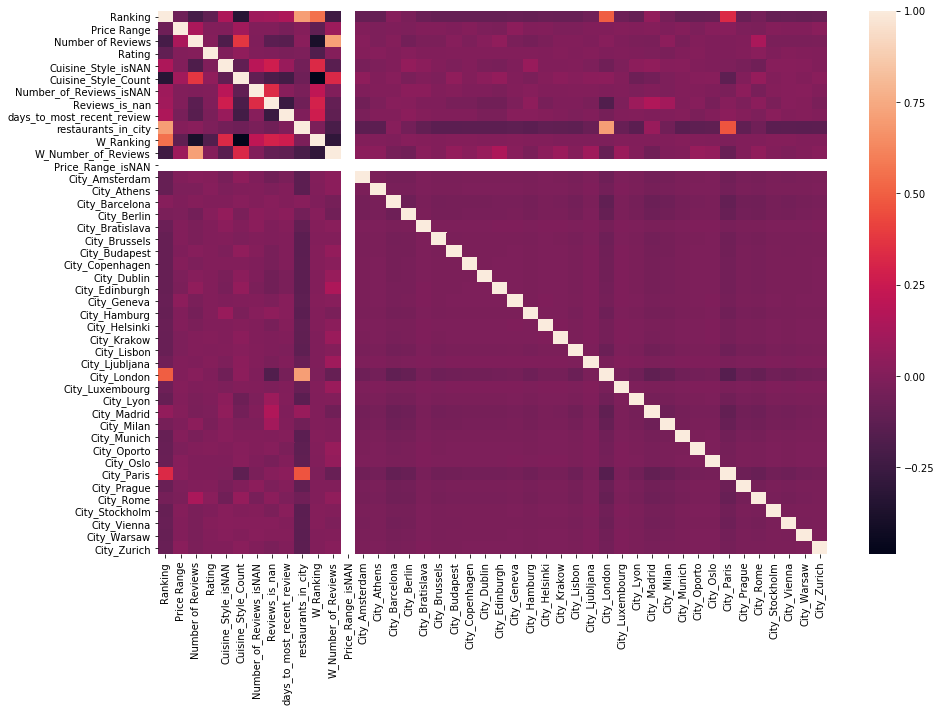

In [67]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

–í–æ–æ–±—â–µ –±–ª–∞–≥–æ–¥–∞—Ä—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –≤ —ç—Ç–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –º–æ–∂–Ω–æ —É–∑–Ω–∞—Ç—å –º–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã—Ö —Ñ–∞–∫—Ç–æ–≤, –Ω–∞–ø—Ä–∏–º–µ—Ä:
* –≥–¥–µ –±–æ–ª—å—à–µ –ü–∏—Ü–µ—Ä–∏–π –≤ –ú–∞–¥—Ä–∏–¥–µ –∏–ª–∏ –õ–æ–Ω–¥–æ–Ω–µ?
* –≤ –∫–∞–∫–æ–º –≥–æ—Ä–æ–¥–µ –∫—É—Ö–Ω—è —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤ –±–æ–ª–µ–µ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–Ω–∞?

–ø—Ä–∏–¥—É–º–∞–π—Ç–µ —Å–≤–æ–∏ –≤–æ–ø—Ä–æ—Å –∏ –Ω–∞–π–¥–∏—Ç–µ –Ω–∞ –Ω–µ–≥–æ –æ—Ç–≤–µ—Ç –≤ –¥–∞–Ω–Ω—ã—Ö)

# Data Preprocessing
–¢–µ–ø–µ—Ä—å, –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –∏ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏ –∫–æ–¥–∞, –∑–∞–≤–µ—Ä–Ω–µ–º –≤—Å—é –æ–±—Ä–∞–±–æ—Ç–∫—É –≤ –æ–¥–Ω—É –±–æ–ª—å—à—É—é —Ñ—É–Ω–∫—Ü–∏—é.

In [68]:
# –Ω–∞ –≤—Å—è–∫–∏–π —Å–ª—É—á–∞–π, –∑–∞–Ω–æ–≤–æ –ø–æ–¥–≥—Ä—É–∂–∞–µ–º –¥–∞–Ω–Ω—ã–µ
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # –ø–æ–º–µ—á–∞–µ–º –≥–¥–µ —É –Ω–∞—Å —Ç—Ä–µ–π–Ω
df_test['sample'] = 0 # –ø–æ–º–µ—á–∞–µ–º –≥–¥–µ —É –Ω–∞—Å —Ç–µ—Å—Ç
df_test['Rating'] = 0 # –≤ —Ç–µ—Å—Ç–µ —É –Ω–∞—Å –Ω–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è Rating, –º—ã –µ–≥–æ –¥–æ–ª–∂–Ω—ã –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å, –ø–æ —ç—Ç–æ–º—É –ø–æ–∫–∞ –ø—Ä–æ—Å—Ç–æ –∑–∞–ø–æ–ª–Ω—è–µ–º –Ω—É–ª—è–º–∏
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

#data = df_test.append(df_train, sort=False).reset_index(drop=True) # –æ–±—ä–µ–¥–∏–Ω—è–µ–º
#data.info()

In [69]:
data.drop(columns=['Restaurant_id', 'Cuisine Style', 'Ranking', 'Reviews', 'URL_TA', 'ID_TA',
                   'recent_review_date','old_review_date'],inplace=True)

In [70]:
#data = data.select_dtypes(exclude=['object','datetime64[ns]'])

#### –ó–∞–ø—É—Å–∫–∞–µ–º –∏ –ø—Ä–æ–≤–µ—Ä—è–µ–º —á—Ç–æ –ø–æ–ª—É—á–∏–ª–æ—Å—å

In [71]:
df_preproc = data
df_preproc.sample(10)

Price Range  Number of Reviews  sample  Rating  Cuisine_Style_isNAN  \
21526           50        1803.000000       1     4.0                    0   
6336            50         497.000000       0     0.0                    0   
14527           50          37.000000       1     4.0                    0   
437             50          76.000000       0     0.0                    0   
22599           50          89.000000       1     3.0                    0   
15656           10          54.000000       1     4.0                    0   
20620          200         154.276382       1     4.0                    0   
21619           50          60.000000       1     3.5                    0   
39283           50          30.000000       1     4.0                    0   
12287           50          26.000000       1     5.0                    1   

       Cuisine_Style_Count  Number_of_Reviews_isNAN  Reviews_is_nan  \
21526                   93                        0             0.0   
6336                    43                        0             0.0   
14527                   16                        0             0.0   
437                     43                        0             0.0   
22599                    6                        0             0.0   
15656                   27                        0             0.0   
20620                    6                        1             1.0   
21619                   26                        0             0.0   
39283                   10                        0             0.0   
12287                   30                        0             1.0   

      Days_between_reviews  days_to_most_recent_review  ...  City_Munich  \
21526                   84                          56  ...            0   
6336                    22                          85  ...            0   
14527                  102                         152  ...            0   
437                     41                         126  ...            0   
22599                  101                         544  ...            0   
15656                  181                         143  ...            0   
20620                    0                          50  ...            0   
21619                  193                         211  ...            0   
39283                  560                          49  ...            0   
12287                    0                          50  ...            0   

       City_Oporto  City_Oslo  City_Paris City_Prague City_Rome  \
21526            0          0           0           0         1   
6336             0          0           1           0         0   
14527            0          0           1           0         0   
437              0          0           0           0         0   
22599            0          0           1           0         0   
15656            0          0           0           0         0   
20620            0          0           0           0         0   
21619            0          0           1           0         0   
39283            0          0           0           0         0   
12287            0          0           0           0         0   

      City_Stockholm City_Vienna City_Warsaw City_Zurich  
21526              0           0           0           0  
6336               0           0           0           0  
14527              0           0           0           0  
437                0           1           0           0  
22599              0           0           0           0  
15656              0           0           0           0  
20620              0           0           0           0  
21619              0           0           0           0  
39283              0           0           0           0  
12287              0           0           0           0  

[10 rows x 51 columns]

In [72]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 51 columns):
Price Range                   50000 non-null int64
Number of Reviews             50000 non-null float64
sample                        50000 non-null int64
Rating                        50000 non-null float64
Cuisine_Style_isNAN           50000 non-null uint8
Cuisine_Style_Count           50000 non-null int64
Number_of_Reviews_isNAN       50000 non-null uint8
Reviews_is_nan                50000 non-null float64
Days_between_reviews          50000 non-null object
days_to_most_recent_review    50000 non-null int64
restaurants_in_city           50000 non-null int64
W_Ranking                     50000 non-null float64
W_Number_of_Reviews           50000 non-null float64
Price_Range_isNAN             50000 non-null uint8
French                        50000 non-null object
Italian                       50000 non-null object
Pizza                         50000 non-null object
Spanish   

In [73]:

df_preproc = df_preproc.astype({"French": float,"Italian": float,"Pizza": float,"Spanish": float,
                               "Vegetarian Friendly": float, "Days_between_reviews": float,
                                "Reviews_eval": float})
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 51 columns):
Price Range                   50000 non-null int64
Number of Reviews             50000 non-null float64
sample                        50000 non-null int64
Rating                        50000 non-null float64
Cuisine_Style_isNAN           50000 non-null uint8
Cuisine_Style_Count           50000 non-null int64
Number_of_Reviews_isNAN       50000 non-null uint8
Reviews_is_nan                50000 non-null float64
Days_between_reviews          50000 non-null float64
days_to_most_recent_review    50000 non-null int64
restaurants_in_city           50000 non-null int64
W_Ranking                     50000 non-null float64
W_Number_of_Reviews           50000 non-null float64
Price_Range_isNAN             50000 non-null uint8
French                        50000 non-null float64
Italian                       50000 non-null float64
Pizza                         50000 non-null float64
Spanis

In [74]:
# –¢–µ–ø–µ—Ä—å –≤—ã–¥–µ–ª–∏–º —Ç–µ—Å—Ç–æ–≤—É—é —á–∞—Å—Ç—å
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # –Ω–∞—à —Ç–∞—Ä–≥–µ—Ç
X = train_data.drop(['Rating'], axis=1)

**–ü–µ—Ä–µ–¥ —Ç–µ–º –∫–∞–∫ –æ—Ç–ø—Ä–∞–≤–ª—è—Ç—å –Ω–∞—à–∏ –¥–∞–Ω–Ω—ã–µ –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ, —Ä–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –µ—â–µ –æ–¥–∏–Ω —Ç–µ—Å—Ç –∏ —Ç—Ä–µ–π–Ω, –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–∏. 
–≠—Ç–æ –ø–æ–º–æ–∂–µ—Ç –Ω–∞–º –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, –∫–∞–∫ —Ö–æ—Ä–æ—à–æ –Ω–∞—à–∞ –º–æ–¥–µ–ª—å —Ä–∞–±–æ—Ç–∞–µ—Ç, –¥–æ –æ—Ç–ø—Ä–∞–≤–∫–∏ submissiona –Ω–∞ kaggle.**

In [75]:
# –í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–µ train_test_split –¥–ª—è —Ä–∞–∑–±–∏–≤–∫–∏ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
# –≤—ã–¥–µ–ª–∏–º 20% –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é (–ø–∞—Ä–∞–º–µ—Ç—Ä test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [76]:
# –ø—Ä–æ–≤–µ—Ä—è–µ–º
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 50), (40000, 50), (40000, 49), (32000, 49), (8000, 49))

# Model 
–°–∞–º ML

In [77]:
# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏:
from sklearn.ensemble import RandomForestRegressor # –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –∏ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏
from sklearn import metrics # –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏

In [78]:
# –°–æ–∑–¥–∞—ë–º –º–æ–¥–µ–ª—å (–ù–ê–°–¢–†–û–ô–ö–ò –ù–ï –¢–†–û–ì–ê–ï–ú)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [79]:
# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö
model.fit(X_train, y_train)

# –ò—Å–ø–æ–ª—å–∑—É–µ–º –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Ä–µ–π—Ç–∏–Ω–≥–∞ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–æ–≤ –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∑–∞–ø–∏—Å—ã–≤–∞–µ–º –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [80]:
# –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è (y_pred) —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ (y_test), –∏ —Å–º–æ—Ç—Ä–∏–º –Ω–∞—Å–∫–æ–ª—å–∫–æ –æ–Ω–∏ –≤ —Å—Ä–µ–¥–Ω–µ–º –æ—Ç–ª–∏—á–∞—é—Ç—Å—è
# –ú–µ—Ç—Ä–∏–∫–∞ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è Mean Absolute Error (MAE) –∏ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å—Ä–µ–¥–Ω–µ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –æ—Ç —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.202674375


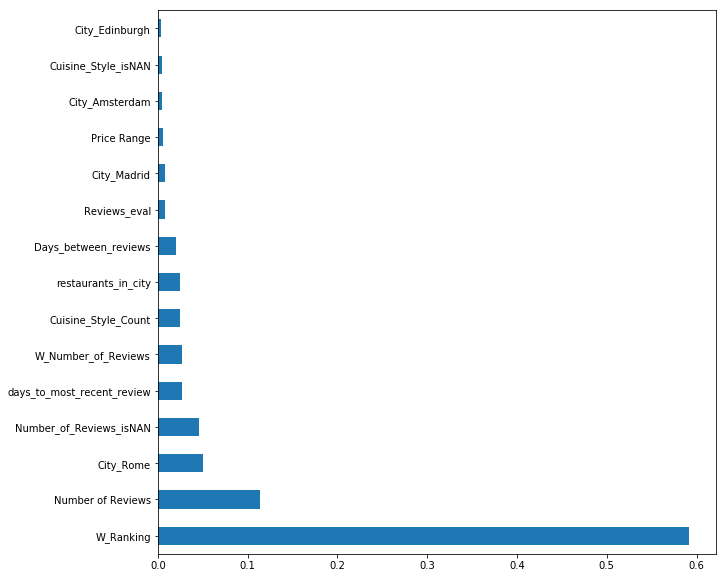

In [81]:
# –≤ RandomForestRegressor –µ—Å—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –≤—ã–≤–µ—Å—Ç–∏ —Å–∞–º—ã–µ –≤–∞–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –º–æ–¥–µ–ª–∏
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
–ï—Å–ª–∏ –≤—Å–µ —É—Å—Ç—Ä–∞–µ–≤–∞–µ—Ç - –≥–æ—Ç–æ–≤–∏–º Submission –Ω–∞ –∫–∞–≥–ª

In [82]:
test_data.sample(10)

Price Range  Number of Reviews  Rating  Cuisine_Style_isNAN  \
1970           50           2.000000     0.0                    1   
5533           50           4.000000     0.0                    1   
7784           50         232.000000     0.0                    0   
7924           50          12.000000     0.0                    0   
3929           50          18.000000     0.0                    0   
7038           50          20.000000     0.0                    0   
4917           50           6.000000     0.0                    0   
1523           50         243.000000     0.0                    0   
7445           50         341.000000     0.0                    0   
5553           10         127.830078     0.0                    0   

      Cuisine_Style_Count  Number_of_Reviews_isNAN  Reviews_is_nan  \
1970                    7                        0             0.0   
5533                   19                        0             1.0   
7784                   45                        0             0.0   
7924                   22                        0             0.0   
3929                   28                        0             0.0   
7038                    9                        0             0.0   
4917                    4                        0             1.0   
1523                   48                        0             0.0   
7445                   42                        0             0.0   
5553                   11                        1             0.0   

      Days_between_reviews  days_to_most_recent_review  restaurants_in_city  \
1970                  54.0                         115                 2705   
5533                   0.0                          50                 6108   
7784                  23.0                          12                 1314   
7924                  99.0                         312                 3395   
3929                 198.0                          62                 3395   
7038                   0.0                         560                 3813   
4917                   0.0                          50                 1443   
1523                  10.0                          77                 7193   
7445                   5.0                          50                  776   
5553                   0.0                         179                 1647   

      ...  City_Munich  City_Oporto  City_Oslo  City_Paris  City_Prague  \
1970  ...            0            0          0           0            0   
5533  ...            0            0          0           1            0   
7784  ...            0            0          0           0            0   
7924  ...            0            0          0           0            0   
3929  ...            0            0          0           0            0   
7038  ...            0            0          0           0            0   
4917  ...            0            0          0           0            0   
1523  ...            0            0          0           0            0   
7445  ...            0            0          0           0            0   
5553  ...            0            0          0           0            0   

      City_Rome  City_Stockholm  City_Vienna  City_Warsaw  City_Zurich  
1970          0               0            0            0            0  
5533          0               0            0            0            0  
7784          0               0            0            0            0  
7924          0               0            0            0            0  
3929          0               0            0            0            0  
7038          0               0            0            0            0  
4917          0               0            1            0            0  
1523          0               0            0            0            0  
7445          0               0            0            0            0  
5553          0               0            0     

In [83]:
test_data = test_data.drop(['Rating'], axis=1)

In [84]:
sample_submission

Restaurant_id  Rating
0             id_0     2.0
1             id_1     2.5
2             id_2     4.0
3             id_3     1.0
4             id_4     4.0
...            ...     ...
9995       id_9995     3.0
9996       id_9996     1.5
9997       id_9997     4.5
9998       id_9998     1.0
9999       id_9999     2.5

[10000 rows x 2 columns]

In [85]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [86]:
predict_submission

array([2.965, 4.31 , 4.375, ..., 3.06 , 4.505, 4.405])

In [87]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

Restaurant_id  Rating
0          id_0   2.965
1          id_1   4.310
2          id_2   4.375
3          id_3   4.320
4          id_4   4.425
5          id_5   4.450
6          id_6   2.795
7          id_7   2.675
8          id_8   4.145
9          id_9   4.655

# What's next?
–ò–ª–∏ —á—Ç–æ –¥–µ–ª–∞—Ç—å, —á—Ç–æ–± —É–ª—É—á—à–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç:
* –û–±—Ä–∞–±–æ—Ç–∞—Ç—å –æ—Å—Ç–∞–≤—à–∏–µ—Å—è –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ –ø–æ–Ω—è—Ç–Ω—ã–π –¥–ª—è –º–∞—à–∏–Ω—ã —Ñ–æ—Ä–º–∞—Ç
* –ü–æ—Å–º–æ—Ç—Ä–µ—Ç—å, —á—Ç–æ –µ—â–µ –º–æ–∂–Ω–æ –∏–∑–≤–ª–µ—á—å –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
* –°–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
* –ü–æ–¥–≥—Ä—É–∑–∏—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ, –Ω–∞–ø—Ä–∏–º–µ—Ä: –ø–æ –Ω–∞—Å–µ–ª–µ–Ω–∏—é –∏–ª–∏ –±–ª–∞–≥–æ—Å–æ—Å—Ç–æ—è–Ω–∏—é –≥–æ—Ä–æ–¥–æ–≤
* –ü–æ–¥–æ–±—Ä–∞—Ç—å —Å–æ—Å—Ç–∞–≤ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–í –æ–±—â–µ–º, –ø—Ä–æ—Ü–µ—Å—Å —Ç–≤–æ—Ä—á–µ—Å–∫–∏–π –∏ –≤–µ—Å—å–º–∞ —É–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–π! –£–¥–∞—á–∏ –≤ —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏–∏!
